## 範例重點
* 了解如何 reset Tensorflow Graph
* 學習如何以迴圈方式訓練不同超參數的模型
* 學習如何以迴圈方式繪圖

In [1]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zuoo5\Anaco

In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.8314 - acc: 0.3431 - val_loss: 1.7051 - val_acc: 0.3950
Epoch 2/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.6012 - acc: 0.4324 - val_loss: 1.5881 - val_acc: 0.4296
Epoch 3/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5121 - acc: 0.4618 - val_loss: 1.6363 - val_acc: 0.4247
Epoch 4/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4558 - acc: 0.4803 - val_loss: 1.4808 - val_acc: 0.4706
Epoch 5/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4080 - acc: 0.4992 - val_loss: 1.5014 - val_acc: 0.4700
Epoch 6/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3697 - acc: 0.5127 - val_loss: 1.5637 - val_acc: 0.4533
Epoch 7/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3380 - acc: 0.5243 - val_loss: 1.4756 - val_acc

50000/50000 [==============================] - 3s 64us/step - loss: 1.8112 - acc: 0.3649 - val_loss: 1.7644 - val_acc: 0.3794
Epoch 3/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.7244 - acc: 0.3977 - val_loss: 1.6991 - val_acc: 0.4027
Epoch 4/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.6631 - acc: 0.4179 - val_loss: 1.6470 - val_acc: 0.4255
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6154 - acc: 0.4328 - val_loss: 1.6073 - val_acc: 0.4339
Epoch 6/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5753 - acc: 0.4498 - val_loss: 1.5720 - val_acc: 0.4455
Epoch 7/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5430 - acc: 0.4590 - val_loss: 1.5503 - val_acc: 0.4522
Epoch 8/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5130 - acc: 0.4686 - val_loss: 1.5307 - val_acc: 0.4559
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.9722 - acc: 0.3066 - val_loss: 1.9512 - val_acc: 0.3143
Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.9346 - acc: 0.3217 - val_loss: 1.9192 - val_acc: 0.3243
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.9049 - acc: 0.3322 - val_loss: 1.8951 - val_acc: 0.3361
Epoch 7/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8814 - acc: 0.3411 - val_loss: 1.8717 - val_acc: 0.3456
Epoch 8/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.8619 - acc: 0.3479 - val_loss: 1.8542 - val_acc: 0.3514
Epoch 9/50
50000/50000 [==============================] - 3s 63us/step - loss: 1.8452 - acc: 0.3558 - val_loss: 1.8392 - val_acc: 0.3578
Epoch 10/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.8306 - acc: 0.3611 - val_loss: 1.8247 - val_acc: 0.3652
Epoch 11/50
50000/50000 [===============

50000/50000 [==============================] - 3s 62us/step - loss: 2.2092 - acc: 0.2197 - val_loss: 2.2040 - val_acc: 0.2290
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.1926 - acc: 0.2293 - val_loss: 2.1882 - val_acc: 0.2374
Epoch 7/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.1771 - acc: 0.2366 - val_loss: 2.1733 - val_acc: 0.2446
Epoch 8/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.1626 - acc: 0.2445 - val_loss: 2.1594 - val_acc: 0.2475
Epoch 9/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.1493 - acc: 0.2509 - val_loss: 2.1466 - val_acc: 0.2545
Epoch 10/50
50000/50000 [==============================] - 3s 62us/step - loss: 2.1370 - acc: 0.2566 - val_loss: 2.1347 - val_acc: 0.2611
Epoch 11/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.1256 - acc: 0.2614 - val_loss: 2.1236 - val_acc: 0.2634
Epoch 12/50
50000/50000 [=========================

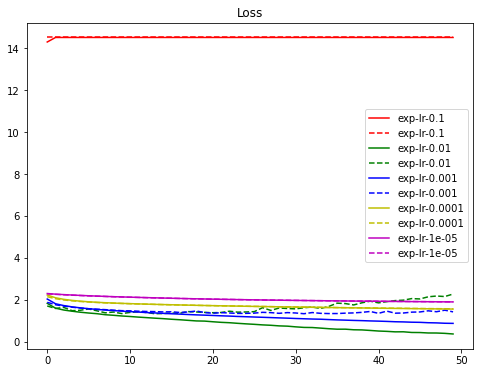

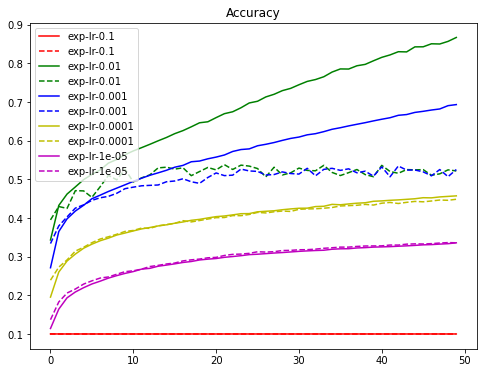

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現